In [1]:
import numpy as np
import cv2 as cv
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from apt.quadtree import FixedQuadTree

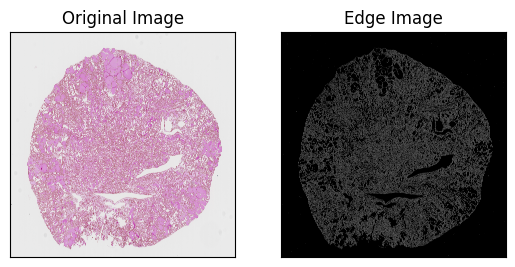

In [2]:
# img = cv.imread('/Users/zhangenzhi/work/gvit-1/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_image_0_512x512.png')
# img = cv.imread('/Volumes/data/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_image_0_512x512.png')
img = cv.imread('/Volumes/data/dataset/miccai/rescale-images-16384/rescaled_image_0_16384x16384.png')
# img = cv.imread('/Volumes/Extreme/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_image_0_512x512.png')


grey_img = cv.GaussianBlur(img, (5,5), 0)
edges = cv.Canny(grey_img, 50, 110)
# resized_image = cv.resize(img, (8192,8192))

plt.subplot(121),plt.imshow(grey_img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

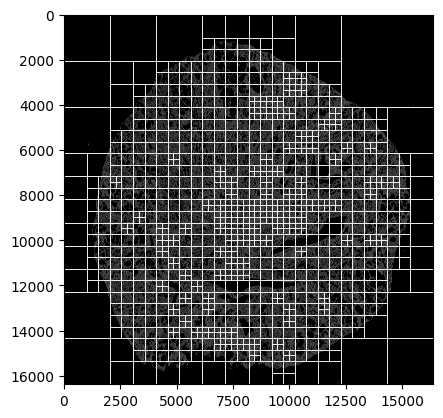

1024


In [3]:
fig, ax = plt.subplots()
ax.imshow(edges, cmap = 'gray')
qdt = FixedQuadTree(domain=edges, fixed_length=1024)
qdt.draw(ax=ax)
plt.show()
print(qdt.count_patches())
plt.close()

In [4]:
qdt.encode_nodes()

[[0, 2048, 14336, 16384],
 [2048, 3072, 15360, 16384],
 [3072, 4096, 15360, 16384],
 [2048, 3072, 14336, 15360],
 [3072, 3584, 14848, 15360],
 [3584, 4096, 14848, 15360],
 [3072, 3584, 14336, 14848],
 [3584, 4096, 14336, 14848],
 [0, 2048, 12288, 14336],
 [2048, 2560, 13824, 14336],
 [2560, 3072, 13824, 14336],
 [2048, 2560, 13312, 13824],
 [2560, 3072, 13312, 13824],
 [3072, 3584, 13824, 14336],
 [3584, 4096, 13824, 14336],
 [3072, 3584, 13312, 13824],
 [3584, 4096, 13312, 13824],
 [2048, 2560, 12800, 13312],
 [2560, 3072, 12800, 13312],
 [2048, 2560, 12288, 12800],
 [2560, 3072, 12288, 12800],
 [3072, 3584, 12800, 13312],
 [3584, 4096, 12800, 13312],
 [3072, 3584, 12288, 12800],
 [3584, 4096, 12288, 12800],
 [4096, 5120, 15360, 16384],
 [5120, 6144, 15360, 16384],
 [4096, 4608, 14848, 15360],
 [4608, 5120, 14848, 15360],
 [4096, 4608, 14336, 14848],
 [4608, 5120, 14336, 14848],
 [5120, 5632, 14848, 15360],
 [5632, 6144, 14848, 15360],
 [5120, 5632, 14336, 14848],
 [5632, 6144, 14336,

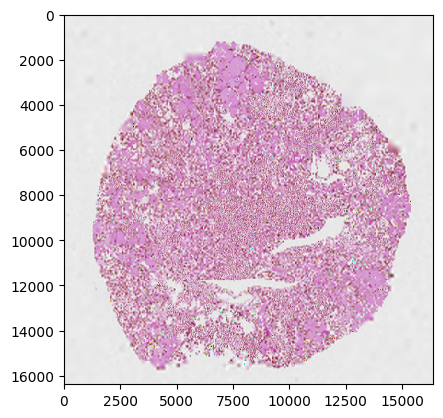

In [5]:
def patchify(mask, patch_size=8, channel=3):
    seq = qdt.serialize(mask, size=(patch_size,patch_size,channel))
    return seq

def depatchify(seq, patch_size=8, channel=3):
    # mask = np.zeros(shape=(512, 512, 3))
    mask = qdt.deserialize(seq, patch_size=patch_size, channel=channel)
    return mask

mask=img
seq = patchify(mask=mask)

fig, ax = plt.subplots()
mask= depatchify(seq=np.asarray(seq))
mask = mask.astype(np.uint8)
ax.imshow(mask, cmap = 'gray')
plt.show()
plt.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


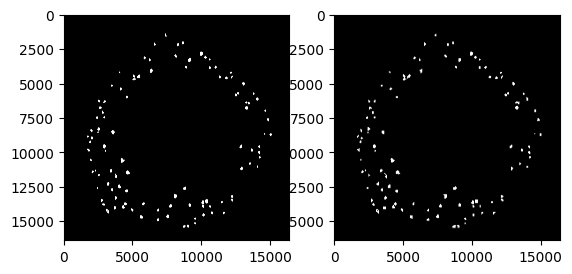

In [6]:
# mask = cv.imread('/Volumes/Extreme/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_mask_0_512x512.png')
mask = cv.imread('/Volumes/data/dataset/miccai/rescale-masks-16384/rescaled_image_0_16384x16384.png')
# mask = cv.imread('/Volumes/data/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_mask_0_512x512.png')
# mask = cv.resize(mask, (512, 512))

seq = patchify(mask=mask, patch_size=8, channel=3)

plt.subplot(121)
plt.imshow(mask)
mask= depatchify(seq=seq, patch_size=8, channel=3)
mask = mask.astype(int)
plt.subplot(122)
plt.imshow(mask)
ax.imshow(mask, cmap = 'gray')
plt.show()
plt.close()


In [ ]:
np.asarray(seq).shape
mask.shape